In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/smoking_driking_dataset_Ver01.csv')
df_drinker = df[df['sex'] == 'Male']
df_nondrinker = df[df['sex'] == 'Female']

In [25]:
df_drinker.SMK_stat_type_cd.value_counts()/df_drinker.shape[0]

3.0    0.375571
1.0    0.312835
2.0    0.311594
Name: SMK_stat_type_cd, dtype: float64

In [26]:
df_nondrinker.SMK_stat_type_cd.value_counts()/df_nondrinker.shape[0]

1.0    0.941559
3.0    0.034947
2.0    0.023494
Name: SMK_stat_type_cd, dtype: float64

In [27]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/smoking_driking_dataset_Ver01.csv')
df.drop('DRK_YN', axis=1, inplace=True)
#Male get one hot encoding
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

#Normalise df
#normalization
df.iloc[:,:-1]=  (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / (df.iloc[:,:-1].std())

random_state = 75
df_1 = df[df['SMK_stat_type_cd'] == 1.0].sample(5000,random_state=random_state)
df_2 = df[df['SMK_stat_type_cd'] == 2.0].sample(5000,random_state=random_state)
df_3 = df[df['SMK_stat_type_cd'] == 3.0].sample(5000,random_state=random_state)

X_1,y_1 = np.array(df_1.drop('SMK_stat_type_cd',axis=1)),np.array(df_1['SMK_stat_type_cd'])
X_2,y_2 = np.array(df_2.drop('SMK_stat_type_cd',axis=1)),np.array(df_2['SMK_stat_type_cd'])
X_3,y_3 = np.array(df_3.drop('SMK_stat_type_cd',axis=1)),np.array(df_3['SMK_stat_type_cd'])

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.2,random_state=random_state)
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.2,random_state=random_state)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X_3,y_3,test_size=0.2,random_state=random_state)

X_train = np.concatenate((X_train_1,X_train_2,X_train_3))
y_train = np.concatenate((y_train_1,y_train_2,y_train_3))

X_test = np.concatenate((X_test_1,X_test_2,X_test_3))
y_test = np.concatenate((y_test_1,y_test_2,y_test_3))

#We shuffle the data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train,random_state=random_state)
X_test,y_test = shuffle(X_test,y_test,random_state=random_state)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,weights='distance',algorithm='auto',p=2,metric='minkowski')

from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)

model = knn
scoring=('accuracy')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Train accuracy: 1.00 (+/- 0.00)
Test accuracy: 0.60 (+/- 0.01)


In [32]:
#### Valdiation curves for KNN : n_neighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.linspace(1,2000,50)
from sklearn.model_selection import KFold, cross_validate
train_acc = []
test_acc = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=int(n),weights='distance',algorithm='auto',p=2,metric='minkowski')
    scores = cross_validate(knn, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc.append(scores['train_score'].mean())
    test_acc.append(scores['test_score'].mean())
    

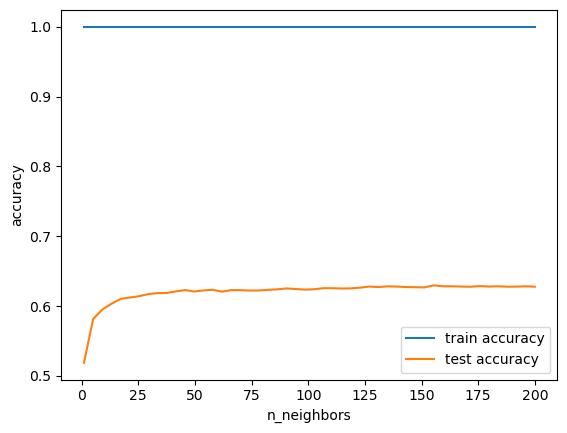

In [7]:
fig, ax = plt.subplots()
ax.plot(neighbors, train_acc, label='train accuracy')
ax.plot(neighbors, test_acc, label='test accuracy')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy')
ax.legend()

plt.show()

In [33]:
#### Valdiation curves for KNN : n_neighbors

neighbors = np.linspace(1,2000,50)
train_acc_un = []
test_acc_un = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=int(n),weights='uniform',algorithm='auto',p=2,metric='minkowski')
    scores = cross_validate(knn, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc_un.append(scores['train_score'].mean())
    test_acc_un.append(scores['test_score'].mean())
    

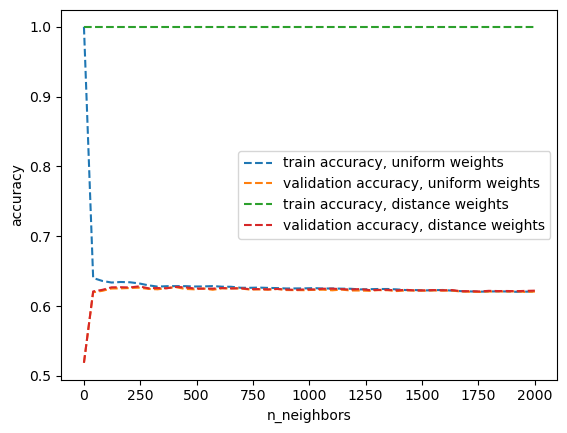

In [38]:
fig, ax = plt.subplots()
ax.plot(neighbors, train_acc_un, label='train accuracy, uniform weights',linestyle='--')
ax.plot(neighbors, test_acc_un, label='validation accuracy, uniform weights',linestyle='--')
ax.plot(neighbors, train_acc, label='train accuracy, distance weights',linestyle='--')
ax.plot(neighbors, test_acc, label='validation accuracy, distance weights',linestyle='--')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy')
ax.legend()

plt.show()

In [40]:

knn_param_grid = {
    'n_neighbors': np.floor(np.logspace(0, 4, 10)).astype(int),
    
    'weights': ['uniform','distance'],
    'p' : [1,2,3]
}


In [41]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 2/4; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 3/4; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 3/4; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 4/4; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 1/4; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 4/4; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 1/4; 3/60] START n_neighbors=1, p=2, weights=uniform........................
[CV 2/4; 3/60] START n_neighbors=1, p=2, weights=uniform........................
[CV 2/4; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 2/4; 3/60] END n_neighbors=1, p=2, weights=uniform;, score=(train=1.000, test=0.514) total time=   0.2s
[CV 3/4; 3/60] START

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/4; 39/60] START n_neighbors=464, p=2, weights=uniform.....................
[CV 2/4; 39/60] START n_neighbors=464, p=2, weights=uniform.....................
[CV 1/4; 39/60] END n_neighbors=464, p=2, weights=uniform;, score=(train=0.630, test=0.617) total time=   0.6s
[CV 3/4; 39/60] START n_neighbors=464, p=2, weights=uniform.....................
[CV 2/4; 39/60] END n_neighbors=464, p=2, weights=uniform;, score=(train=0.627, test=0.627) total time=   0.6s
[CV 4/4; 39/60] START n_neighbors=464, p=2, weights=uniform.....................
[CV 3/4; 39/60] END n_neighbors=464, p=2, weights=uniform;, score=(train=0.626, test=0.637) total time=   0.6s
[CV 1/4; 40/60] START n_neighbors=464, p=2, weights=distance....................
[CV 4/4; 39/60] END n_neighbors=464, p=2, weights=uniform;, score=(train=0.628, test=0.627) total time=   0.6s
[CV 2/4; 40/60] START n_neighbors=464, p=2, weights=distance....................
[CV 1/4; 40/60] END n_neighbors=464, p=2, weights=distance;, score=(tr

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 4/4; 55/60] END n_neighbors=10000, p=1, weights=uniform;, score=(train=0.333, test=0.333) total time=   1.6s
[CV 2/4; 59/60] START n_neighbors=10000, p=3, weights=uniform...................
[CV 1/4; 53/60] END n_neighbors=3593, p=3, weights=uniform;, score=(train=0.600, test=0.589) total time=  11.3s
[CV 3/4; 59/60] START n_neighbors=10000, p=3, weights=uniform...................
[CV 2/4; 53/60] END n_neighbors=3593, p=3, weights=uniform;, score=(train=0.605, test=0.611) total time=  11.2s
[CV 4/4; 59/60] START n_neighbors=10000, p=3, weights=uniform...................
[CV 3/4; 53/60] END n_neighbors=3593, p=3, weights=uniform;, score=(train=0.599, test=0.604) total time=  10.8s
[CV 1/4; 60/60] START n_neighbors=10000, p=3, weights=distance..................
[CV 1/4; 60/60] END n_neighbors=10000, p=3, weights=distance;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/4; 60/60] START n_neighbors=10000, p=3, weights=distance..................
[CV 2/4; 60/60] END n_neighbors=1000

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[CV 4/4; 53/60] END n_neighbors=3593, p=3, weights=uniform;, score=(train=0.601, test=0.597) total time=  10.3s
[CV 2/4; 54/60] END n_neighbors=3593, p=3, weights=distance;, score=(train=1.000, test=0.614) total time=  12.2s
[CV 1/4; 54/60] END n_neighbors=3593, p=3, weights=distance;, score=(train=1.000, test=0.598) total time=  12.2s
[CV 3/4; 54/60] END n_neighbors=3593, p=3, weights=distance;, score=(train=1.000, test=0.609) total time=  11.1s
[CV 4/4; 54/60] END n_neighbors=3593, p=3, weights=distance;, score=(train=1.000, test=0.599) total time=  11.4s
[CV 1/4; 59/60] END n_neighbors=10000, p=3, weights=uniform;, score=(train=0.333, test=0.333) total time=   8.9s
[CV 2/4; 59/60] END n_neighbors=10000, p=3, weights=uniform;, score=(train=0.333, test=0.333) total time=   9.5s
[CV 3/4; 59/60] END n_neighbors=10000, p=3, weights=uniform;, score=(train=0.333, test=0.333) total time=   8.8s
[CV 4/4; 59/60] END n_neighbors=10000, p=3, weights=uniform;, score=(train=0.333, test=0.333) tot

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.51883333 0.51883333 0.52016667 0.52016667 0.51941667 0.51941667
 0.521      0.51883333 0.51966667 0.52016667 0.51566667 0.51941667
 0.58516667 0.58891667 0.58583333 0.58491667 0.58408333 0.58733333
 0.61283333 0.61683333 0.61025    0.611      0.60658333 0.60825
 0.6255     0.62491667 0.62216667 0.62316667 0.61708333 0.62033333
 0.62816667 0.62916667 0.627      0.62741667 0.62466667 0.626
 0.63308333 0.63308333 0.627      0.62725    0.62158333 0.62266667
 0.62666667 0.6285     0.62616667 0.62625    0.6155     0.61641667
 0.61425    0.61791667 0.61083333 0.614      0.60041667 0.605
 0.33333333        nan        nan        nan 0.33333333        nan]
  warnings.warn(
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the train scores are non-fini

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([    1,     2,     7,    21,    59,   166,   464,  1291,  3593,
       10000]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [43]:
knn_grid_search.best_params_

{'n_neighbors': 464, 'p': 1, 'weights': 'uniform'}

## Learning curve

In [46]:
X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)
#Select a sample of X_train, with the corresponding y_train
train_acc_lc = []
val_acc_lc = []
from sklearn.metrics import accuracy_score

for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train_lc,y_train_lc,test_size=float(1 - sample),random_state=random_state)
    
    model = KNeighborsClassifier(**knn_grid_search.best_params_)
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val_lc)
    #Train accuracy
    y_pred_train = model.predict(X_train_sample)
    train_acc_lc.append(accuracy_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_lc.append(accuracy_score(y_val_lc,y_pred))

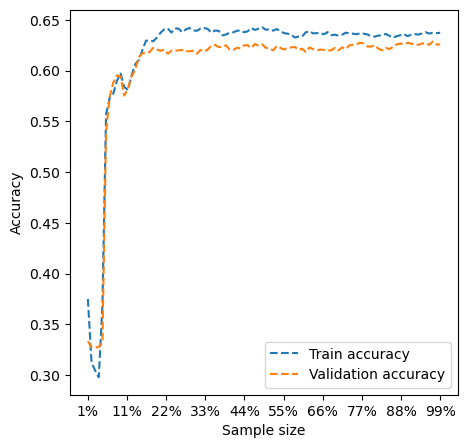

In [47]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.linspace(0.01,0.99,98),train_acc_lc,label='Train accuracy',linestyle='--')
##With dashed line

ax.plot(np.linspace(0.01,0.99,98),val_acc_lc,label='Validation accuracy',linestyle='--')

ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
#x_tick as percentage
ax.set_xticks(np.linspace(0.01,0.99,10))
ax.set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax.legend()

### Greedy Grid search for best features

We create an instance of random weight

Feature selection : We use weight for the metric with 0 and 1, so that some axis are ignored.

Try start with one feature, and then try go get the most importantes features one by one in a greedy approach.
NB while this enables us to greedily get information about the most important features, it does not guarantee that this is the best combination of features. Maybe two features together are more important than each of them individually.

In [61]:

which = np.array(list(itertools.combinations(range(22), 1)))
grid = np.zeros((len(which), 22), dtype="int8")


grid[np.arange(len(which))[None].T, which] = 1
metric_param = []
for weight in grid:
    metric_param.append({'w' : weight})
    

In [62]:

knn_param_grid = {
    'metric_params' : metric_param
    
}

knn_weight = KNeighborsClassifier(n_neighbors= 1, weights='distance',algorithm='auto',p=2,metric='minkowski')
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_weight,
    param_grid=knn_param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=2,
    verbose=10,
    n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 22 candidates, totalling 44 fits
[CV 2/2; 2/22] START metric_params={'w': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 4/22] START metric_params={'w': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 5/22] START metric_params={'w': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 3/22] START metric_params={'w': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 1/22] START metric_params={'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 2/22] START metric_params={'w': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 2/2; 4/22] START metric_params={'w': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[

GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(n_neighbors=1, weights='distance'),
             n_jobs=-1,
             param_grid={'metric_params': [{'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 0,...
                                           {'w': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int8)},
                                           {'w': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int8)}]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [71]:
ind1 = knn_grid_search.best_estimator_.metric_params['w'].argmax()

In [72]:
which = np.array(list(itertools.combinations(range(22), 1)))
grid = np.zeros((len(which), 22), dtype="int8")

# Magic
grid[np.arange(len(which))[None].T, which] = 1
metric_param = []

for w in grid:
    w[ind1] = 1
     metric_param.append({'w' : w})
     

    


In [73]:

knn_param_grid = {
    'metric_params' : metric_param
    
}

knn_weight = KNeighborsClassifier(n_neighbors= 10, weights='distance',algorithm='auto',p=2,metric='minkowski')
from sklearn.model_selection import GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_weight,
    param_grid=knn_param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=2,
    verbose=10,
    n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 22 candidates, totalling 44 fits
[CV 2/2; 4/22] START metric_params={'w': array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 2/2; 2/22] START metric_params={'w': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 2/2; 3/22] START metric_params={'w': array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 1/22] START metric_params={'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}[CV 2/2; 5/22] START metric_params={'w': array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}

[CV 1/2; 4/22] START metric_params={'w': array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[CV 1/2; 2/22] START metric_params={'w': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)}
[

GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(n_neighbors=10, weights='distance'),
             n_jobs=-1,
             param_grid={'metric_params': [{'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 0...
                                           {'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int8)},
                                           {'w': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int8)}]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [86]:

#Get argument of all value equal to 1 in kjn_grid_search.best_estimator_.metric_params['w']
ind1 = np.argwhere(knn_grid_search.best_estimator_.metric_params['w'] == 1)

ind1.flatten()

array([0, 1])

In [103]:
mean_train_score = []
mean_test_score = []
ind1

for i in range(5):
    
    

    #
    
    if i == 0:
        ind1 = 0
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
           
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
    else:
        
            
        ind1 = np.argwhere(knn_grid_search.best_estimator_.metric_params['w'] == 1)

        ind1 = ind1.flatten()
        print('Col : {}'.format(df.columns[ind1]))
        
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
            
        

    knn_param_grid = {
        'metric_params' : metric_param
        
    }
   
    knn_weight = KNeighborsClassifier(n_neighbors= 10, weights='distance',algorithm='auto',p=2,metric='minkowski')
    from sklearn.model_selection import GridSearchCV
    knn_grid_search = GridSearchCV(
        estimator=knn_weight,
        param_grid=knn_param_grid,
        scoring='accuracy',
        return_train_score=True,
        cv=2,
        verbose=0,
        n_jobs=-1)

    knn_grid_search.fit(X_train, y_train)
    
    #Add mean train score of best params and mean test score of best params
    
    mean_train_score.append(knn_grid_search.cv_results_['mean_train_score'][knn_grid_search.best_index_])
    mean_test_score.append(knn_grid_search.cv_results_['mean_test_score'][knn_grid_search.best_index_])
    
    #print mean_test_score
    print('Best score : {}'.format(knn_grid_search.best_score_))

    
    

Best score : 0.59575
Col : Index(['sex', 'age'], dtype='object')
Best score : 0.5959166666666667
Col : Index(['sex', 'age', 'hear_right'], dtype='object')
Best score : 0.5941666666666667
Col : Index(['sex', 'age', 'hear_right', 'urine_protein'], dtype='object')
Best score : 0.5996666666666667
Col : Index(['sex', 'age', 'hear_left', 'hear_right', 'urine_protein'], dtype='object')
Best score : 0.5825


In [104]:
for i in range(5,10):
    
    

    #
    
    if i == 0:
        ind1 = 0
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
           
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
    else:
        
            
        ind1 = np.argwhere(knn_grid_search.best_estimator_.metric_params['w'] == 1)

        ind1 = ind1.flatten()
        print('Col : {}'.format(df.columns[ind1]))
        
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
            
        

    knn_param_grid = {
        'metric_params' : metric_param
        
    }
   
    knn_weight = KNeighborsClassifier(n_neighbors= 10, weights='distance',algorithm='auto',p=2,metric='minkowski')
    from sklearn.model_selection import GridSearchCV
    knn_grid_search = GridSearchCV(
        estimator=knn_weight,
        param_grid=knn_param_grid,
        scoring='accuracy',
        return_train_score=True,
        cv=2,
        verbose=0,
        n_jobs=-1)

    knn_grid_search.fit(X_train, y_train)
    
    #Add mean train score of best params and mean test score of best params
    
    mean_train_score.append(knn_grid_search.cv_results_['mean_train_score'][knn_grid_search.best_index_])
    mean_test_score.append(knn_grid_search.cv_results_['mean_test_score'][knn_grid_search.best_index_])
    
    #print mean_test_score
    print('Best score : {}'.format(knn_grid_search.best_score_))

Col : Index(['sex', 'age', 'sight_right', 'hear_left', 'hear_right',
       'urine_protein'],
      dtype='object')
Best score : 0.56925
Col : Index(['sex', 'age', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'urine_protein'],
      dtype='object')
Best score : 0.5723333333333334
Col : Index(['sex', 'age', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'triglyceride', 'urine_protein'],
      dtype='object')
Best score : 0.5964166666666667
Col : Index(['sex', 'age', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'triglyceride', 'hemoglobin', 'urine_protein'],
      dtype='object')
Best score : 0.6032500000000001
Col : Index(['sex', 'age', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'triglyceride', 'hemoglobin', 'urine_protein', 'gamma_GTP'],
      dtype='object')
Best score : 0.6036666666666667


In [105]:
for i in range(10,22):
    
    

    #
    
    if i == 0:
        ind1 = 0
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
           
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
    else:
        
            
        ind1 = np.argwhere(knn_grid_search.best_estimator_.metric_params['w'] == 1)

        ind1 = ind1.flatten()
        print('Col : {}'.format(df.columns[ind1]))
        
        which = np.array(list(itertools.combinations(range(22), 1)))
        grid = np.zeros((len(which), 22), dtype="int8")

    # Magic
        grid[np.arange(len(which))[None].T, which] = 1
        metric_param = []

        for w in grid:
            w[ind1] = 1
            if np.sum(w) != i+1:
                metric_param.append({'w' : w})
            
        

    knn_param_grid = {
        'metric_params' : metric_param
        
    }
   
    knn_weight = KNeighborsClassifier(n_neighbors= 10, weights='distance',algorithm='auto',p=2,metric='minkowski')
    from sklearn.model_selection import GridSearchCV
    knn_grid_search = GridSearchCV(
        estimator=knn_weight,
        param_grid=knn_param_grid,
        scoring='accuracy',
        return_train_score=True,
        cv=2,
        verbose=0,
        n_jobs=-1)

    knn_grid_search.fit(X_train, y_train)
    
    #Add mean train score of best params and mean test score of best params
    
    mean_train_score.append(knn_grid_search.cv_results_['mean_train_score'][knn_grid_search.best_index_])
    mean_test_score.append(knn_grid_search.cv_results_['mean_test_score'][knn_grid_search.best_index_])
    
    #print mean_test_score
    print('Best score : {}'.format(knn_grid_search.best_score_))

Col : Index(['sex', 'age', 'height', 'sight_left', 'sight_right', 'hear_left',
       'hear_right', 'triglyceride', 'hemoglobin', 'urine_protein',
       'gamma_GTP'],
      dtype='object')
Best score : 0.6060833333333333
Col : Index(['sex', 'age', 'height', 'sight_left', 'sight_right', 'hear_left',
       'hear_right', 'triglyceride', 'hemoglobin', 'urine_protein', 'SGOT_AST',
       'gamma_GTP'],
      dtype='object')
Best score : 0.6025833333333332
Col : Index(['sex', 'age', 'height', 'sight_left', 'sight_right', 'hear_left',
       'hear_right', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'gamma_GTP'],
      dtype='object')
Best score : 0.6034166666666667
Col : Index(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'gamma_GTP'],
      dtype='object')
Best score : 0.6081666666666667
Col : Index(['sex', 'age',

ValueError: Parameter grid for parameter 'metric_params' need to be a non-empty sequence, got: []

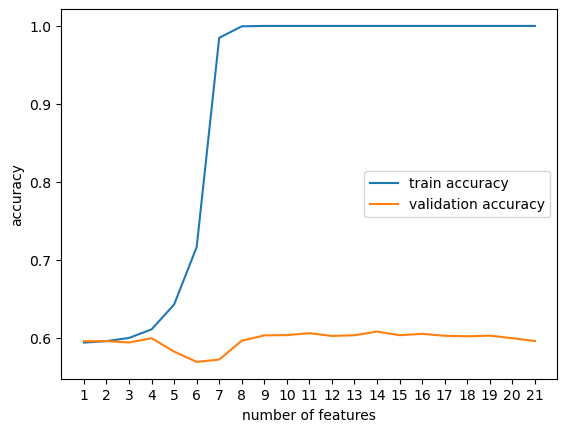

In [110]:
fig, ax = plt.subplots()

ax.plot([i for i in range(1,22)], mean_train_score, label='train accuracy')
ax.plot([i for i in range(1,22)], mean_test_score, label='validation accuracy')
ax.set_xlabel('number of features')
ax.set_ylabel('accuracy')
ax.set_xticks([i for i in range(1,22)])
ax.legend()

plt.show()

In [48]:
#score on test
model = KNeighborsClassifier(**knn_grid_search.best_params_)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6366666666666667